**OLA - Ensemble Learning Business Case**

Dataset Explanation: ola.csv
1. MMMM-YY: Reporting month and year.
2. Driver_ID: A unique identifier for every driver.
3. Age: Age of the driver.
4. Gender: Driver's gender. Male: 0, Female: 1.
5. City: City code representing the city the driver operates in.
6. Education_Level: Education level of the driver, categorized into 0 for 10+, 1 for
12+, and 2 for graduate.
7. Income: Average monthly income of the driver.
8. Date Of Joining: The date when the driver joined Ola.
9. LastWorkingDate: The most recent or final day the driver worked with Ola.
10.Joining Designation: Designation of the driver at the onset of their journey with
Ola.
11. Grade: A grade assigned to the driver at the reporting time, likely denoting
performance or other metrics.
12.Total Business Value: The total monetary value (business) a driver brings in a
month. Negative values might indicate cancellations, refunds, or other financial
adjustments.
13.Quarterly Rating: Rating assigned to drivers on a quarterly basis. Ratings range
from 1 to 5, with 5 being the best.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("ola.csv")
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


# Statistical analysis

In [ ]:
df.shape

(19104, 14)

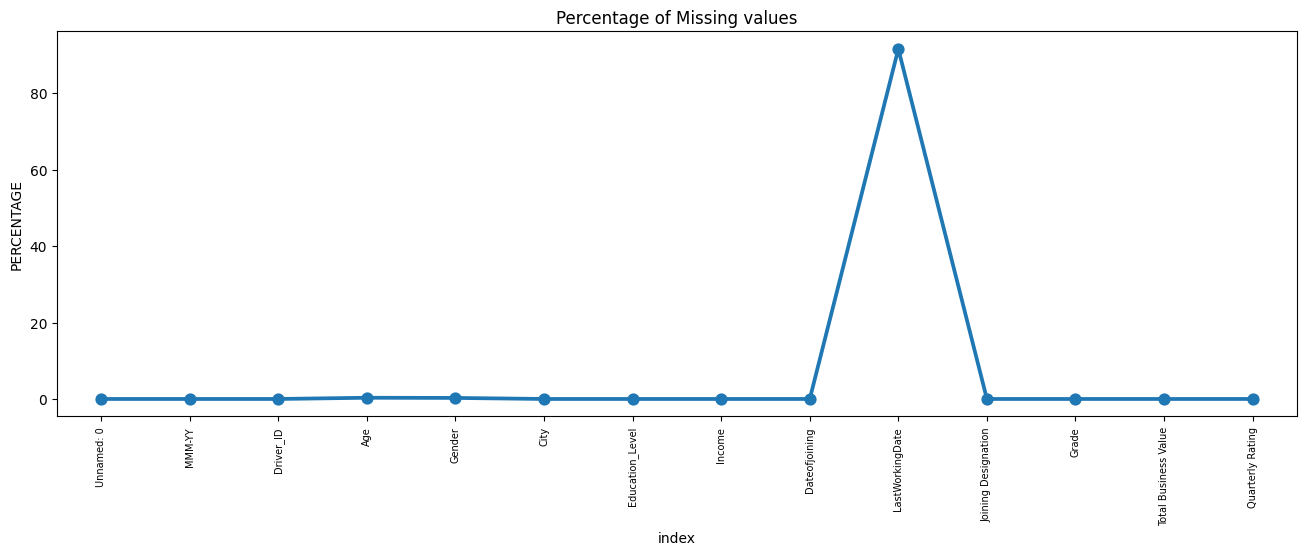

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#all values are present in percentage
round((df.isnull().sum()/len(df))*100,2)

Unnamed: 0               0.00
MMM-YY                   0.00
Driver_ID                0.00
Age                      0.32
Gender                   0.27
City                     0.00
Education_Level          0.00
Income                   0.00
Dateofjoining            0.00
LastWorkingDate         91.54
Joining Designation      0.00
Grade                    0.00
Total Business Value     0.00
Quarterly Rating         0.00
dtype: float64

* 'Unnamed: 0' is  serial no feature so no use of this so better to drop this feature as well
*   age and gender have very less percent amount of null values so it is negligible





In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
print(df.shape,"no of columns after dropped null values column \n")


(19104, 13) no of columns after dropped null values column 



In [ ]:
df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

MMM-YY  and Dateofjoining  are object but this is datecolumn so we can convert it to date from object so it will useful in terms of memory and performance

In [ ]:
df['MMM-YY']=pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"]=pd.to_datetime(df["LastWorkingDate"])

In [ ]:
print("again checking the columns type \n \n",df.dtypes)

again checking the columns type 
 
 MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object


In [ ]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [ ]:
df["MMM-YY"].min(),df["MMM-YY"].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))

In [ ]:
df["Dateofjoining"].min(),df["Dateofjoining"].max()

(Timestamp('2013-04-01 00:00:00'), Timestamp('2020-12-28 00:00:00'))

In [ ]:
df["LastWorkingDate"].min(),df["LastWorkingDate"].max()

(Timestamp('2018-12-31 00:00:00'), Timestamp('2020-12-28 00:00:00'))

above we can see that MMM-YY column is for reporting date , it is range only 2019 to 2020 but dateofjoining is range between 2013 to 2020 , lastworkingdate range between 2018 to 2020 that means we have less data for driver joining before and leave but we have only data between 2019 to 2020 means two year data only

In [ ]:
for i in df.columns:
  if df[i].nunique() <20:
    print(f"\ntotal value present in {i} \n{df[i].value_counts('all')*100}")


total value present in Gender 
0.0    58.125131
1.0    41.874869
Name: Gender, dtype: float64

total value present in Education_Level 
1    35.929648
2    33.118719
0    30.951633
Name: Education_Level, dtype: float64

total value present in Joining Designation 
1    51.460427
2    31.171482
3    14.902638
4     1.784966
5     0.680486
Name: Joining Designation, dtype: float64

total value present in Grade 
2    34.689070
1    27.229899
3    25.261725
4    11.222781
5     1.596524
Name: Grade, dtype: float64

total value present in Quarterly Rating 
1    40.195771
2    29.067211
3    20.388400
4    10.348618
Name: Quarterly Rating, dtype: float64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


In [3]:
agg_functions = {
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last"
}

processed_df = df.groupby(["Driver_ID", "MMM-YY"]).aggregate(agg_functions).sort_index(ascending = [True, True])

processed_df.head()

Age  Gender  Education_Level  Income  \
Driver_ID MMM-YY                                            
1         01/01/19  28.0     0.0                2   57387   
          02/01/19  28.0     0.0                2   57387   
          03/01/19  28.0     0.0                2   57387   
2         11/01/20  31.0     0.0                2   67016   
          12/01/20  31.0     0.0                2   67016   

                    Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                       
1         01/01/19                    1      1               2381060   
          02/01/19                    1      1               -665480   
          03/01/19                    1      1                     0   
2         11/01/20                    2      2                     0   
          12/01/20                    2      2                     0   

                    Quarterly Rating LastWorkingDate City Dateofjoining  
Driver_ID MMM-YY                                                         
1         01/01/19                 2            None  C23      24/12/18  
          02/01/19                 2            None  C23      24/12/18  
          03/01/19                 2        03/11/19  C23      24/12/18  
2         11/01/20                 1            None   C7      11/06/20  
          12/01/20                 1            None   C7      11/06/20

In [ ]:
processed_df.shape

(19104, 11)

In [4]:
final_data = pd.DataFrame()
final_data["Driver_ID"] = df["Driver_ID"].unique()
final_data['Age'] = list(processed_df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
final_data['Gender'] = list(processed_df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
final_data['City'] = list(processed_df.groupby('Driver_ID').agg({'City':'last'})['City'])
final_data['Education'] = list(processed_df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
final_data['Income'] = list(processed_df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
final_data['Joining_Designation'] = list(processed_df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
final_data['Grade'] = list(processed_df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
final_data['Total_Business_Value'] = list(processed_df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
final_data['Last_Quarterly_Rating'] = list(processed_df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [5]:
first_quarter = processed_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "first"})

last_quarter = processed_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "last"})

qr = (last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"]).reset_index()

empid = qr[qr["Quarterly Rating"] == True]["Driver_ID"]

qrl = []
for i in final_data["Driver_ID"]:
    if i in empid.values:
        qrl.append(1)
    else:
        qrl.append(0)


final_data["Quarterly_Rating_Increased"] = qrl

In [6]:
lwd = (processed_df.groupby(["Driver_ID"]).agg({"LastWorkingDate": "last"})["LastWorkingDate"].isna()).reset_index()

lwrid = lwd[lwd["LastWorkingDate"] == True]["Driver_ID"]
target = []

for i in final_data["Driver_ID"]:
    if i in lwrid.values:
        target.append(0)
    else:
        target.append(1)

final_data["target"] = target

0 : churn(leave company)


1: not churn(working)

In [7]:
mrf = processed_df.groupby(["Driver_ID"]).agg({"Income": "first"})

mrl = processed_df.groupby(["Driver_ID"]).agg({"Income": "last"})

mr = (mrl["Income"] > mrf["Income"]).reset_index()

empid = mr[mr["Income"] == True]["Driver_ID"]
income = []
for i in final_data["Driver_ID"]:
    if i in empid.values:
        income.append(1)
    else:
        income.append(0)

final_data["Salary_Increased"] = income

In [8]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.932697e+04,2.837190e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.095758e+00,9.398210e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.498530e+00,8.504188e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,1.532969e-01,3.603492e-01,0.0,0.0,0.0,0.0,1.0


# Graphical Analysis

<Axes: xlabel='target', ylabel='count'>

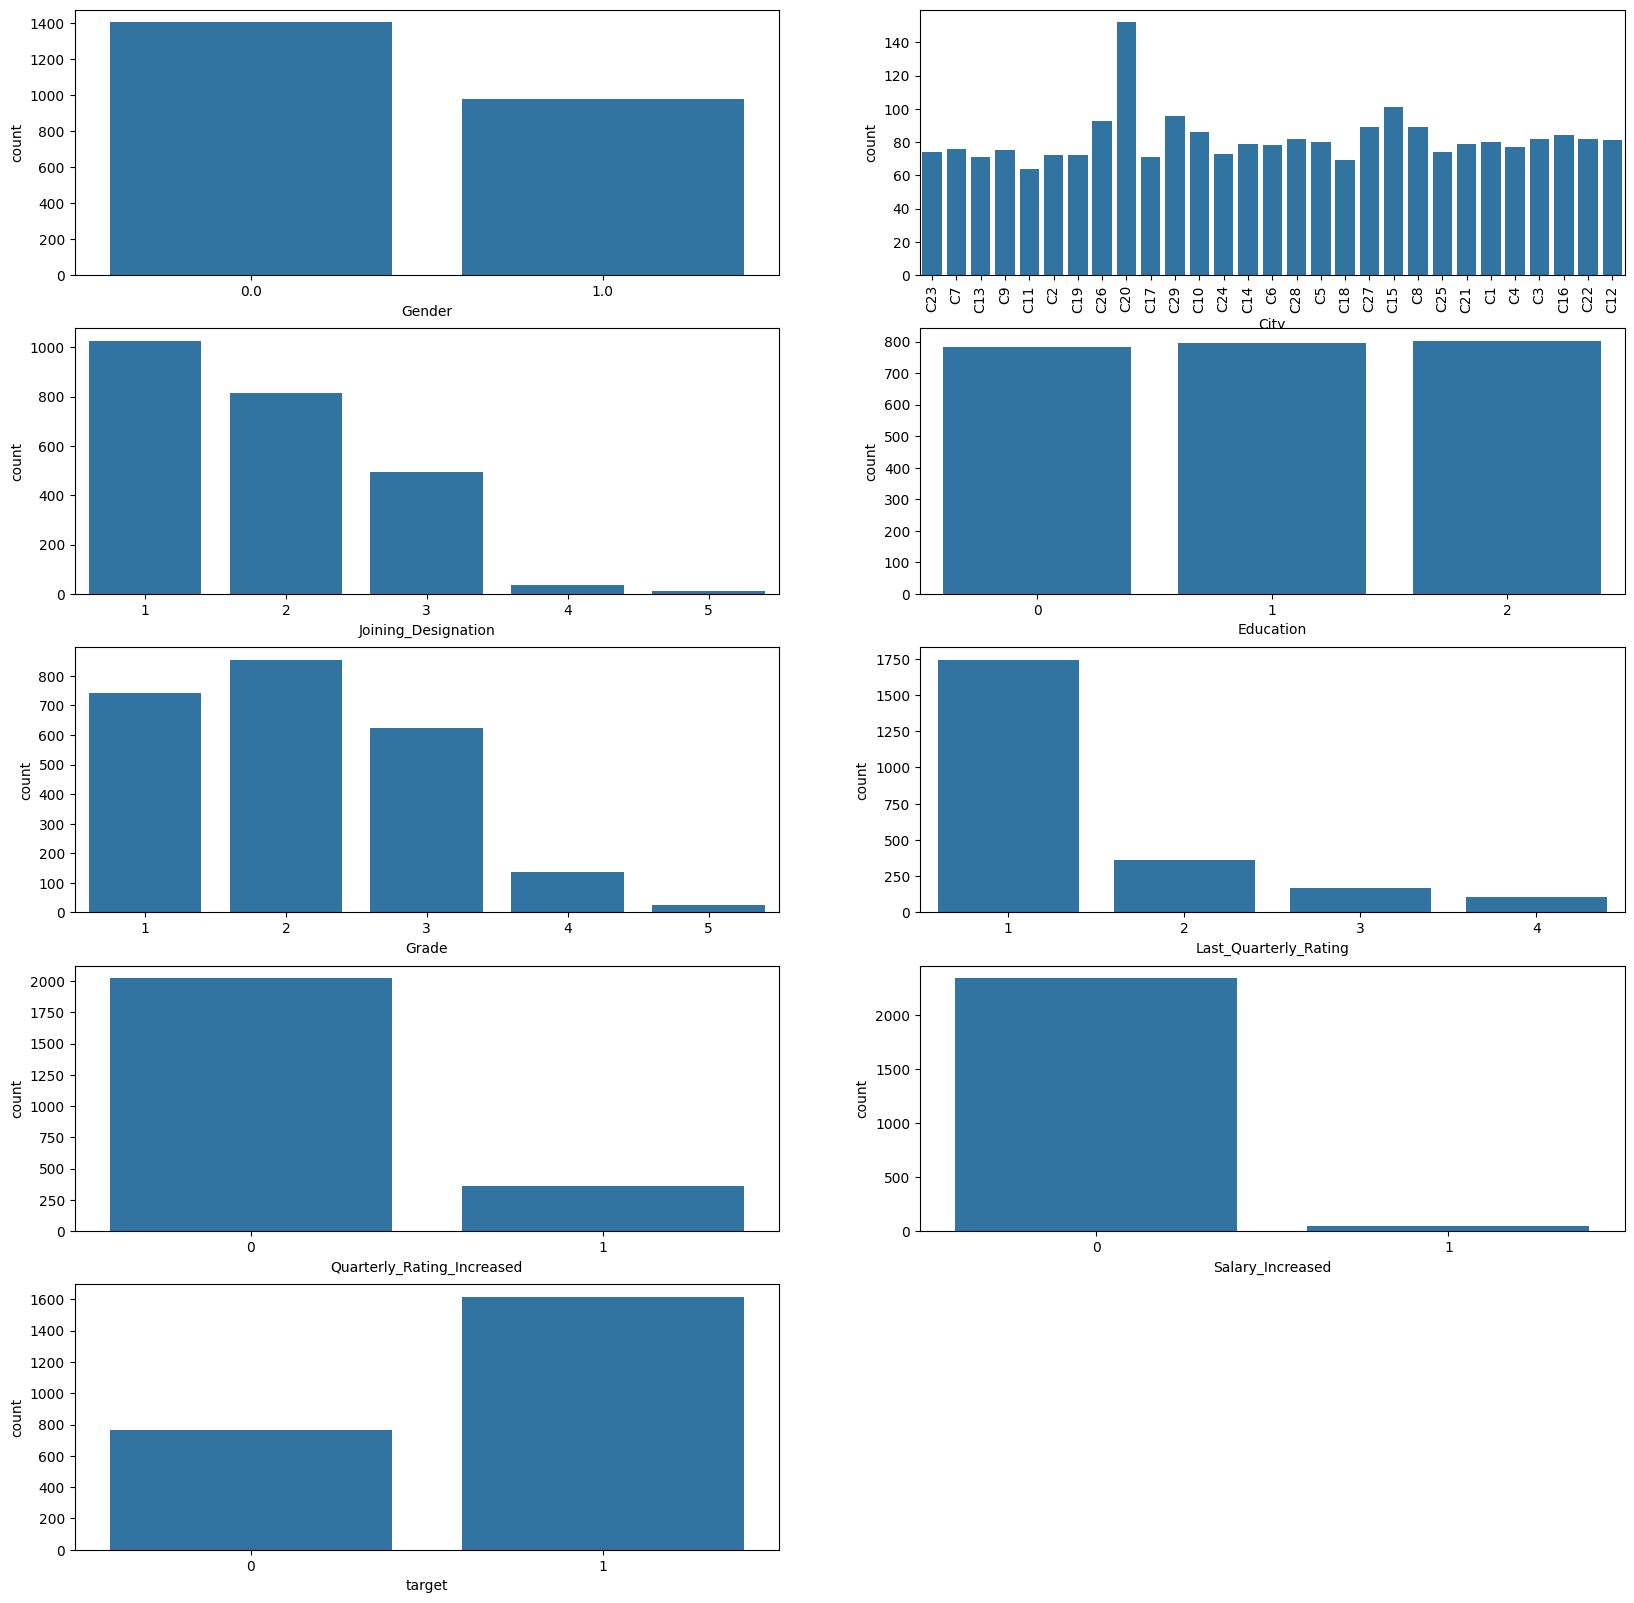

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(521)
sns.countplot(data=final_data, x="Gender")
# final_data["Gender"].value_counts(normalize=True).plot.bar('Gender')

plt.subplot(522)
sns.countplot(data=final_data, x="City")
plt.xticks(rotation=90)

plt.subplot(523)
sns.countplot(data=final_data, x="Joining_Designation")

plt.subplot(524)
sns.countplot(data=final_data, x="Education")

plt.subplot(525)
sns.countplot(data=final_data, x="Grade")

plt.subplot(526)
sns.countplot(data=final_data, x="Last_Quarterly_Rating")

plt.subplot(527)
sns.countplot(data=final_data, x="Quarterly_Rating_Increased")

plt.subplot(528)
sns.countplot(data=final_data, x="Salary_Increased")

plt.subplot(529)
sns.countplot(data=final_data, x="target")

. Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.

. Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.
Out of 2381 employees, 802 employees have their education as Graduate and 795 have completed their 12.

.Out of 2381 employees, 1026 joined with the grade as 1, 815 employees joined with the grade 2.

.Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.

.Out of 2381 employees, 1744 employees had their last quarterly rating as 1.

.Out of 2381 employees, the quarterly rating has not increased for 2076 employees.

.out of 2381 employees, 1616 employees leave the company and 765 working

<ipython-input-93-393b7929f9b4>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


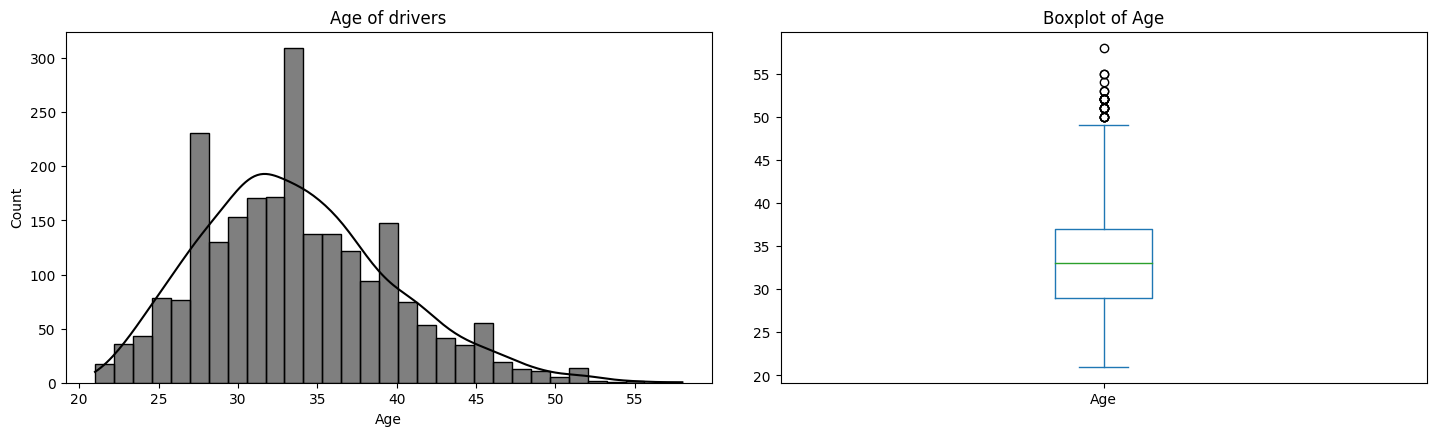

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Age'],color='black', kde=True)
plt.title("Age of drivers")
plt.subplot(122)
final_data['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)


The distribution of age slightly skewed on right which might indicate the outliers in the data

<ipython-input-94-dad00fd67d2f>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


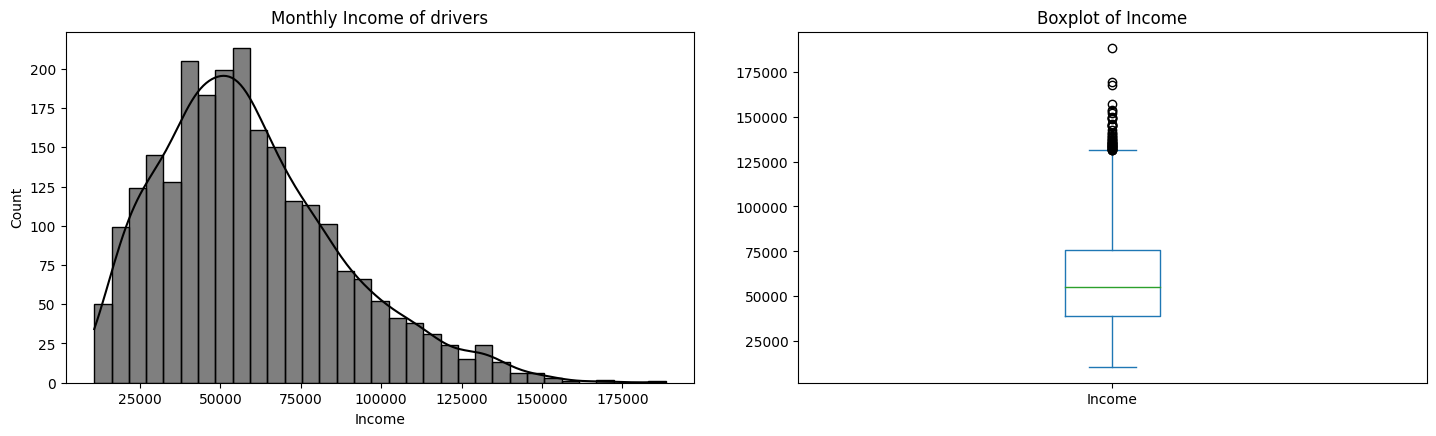

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Income'],color='black', kde=True)
plt.title("Monthly Income of drivers")
plt.subplot(122)
final_data['Income'].plot.box(title='Boxplot of Income')
plt.tight_layout(pad=3)


The distribution of monthly income skewed on right which might indicate the outliers in the data

<ipython-input-95-0ec1936d8cf4>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


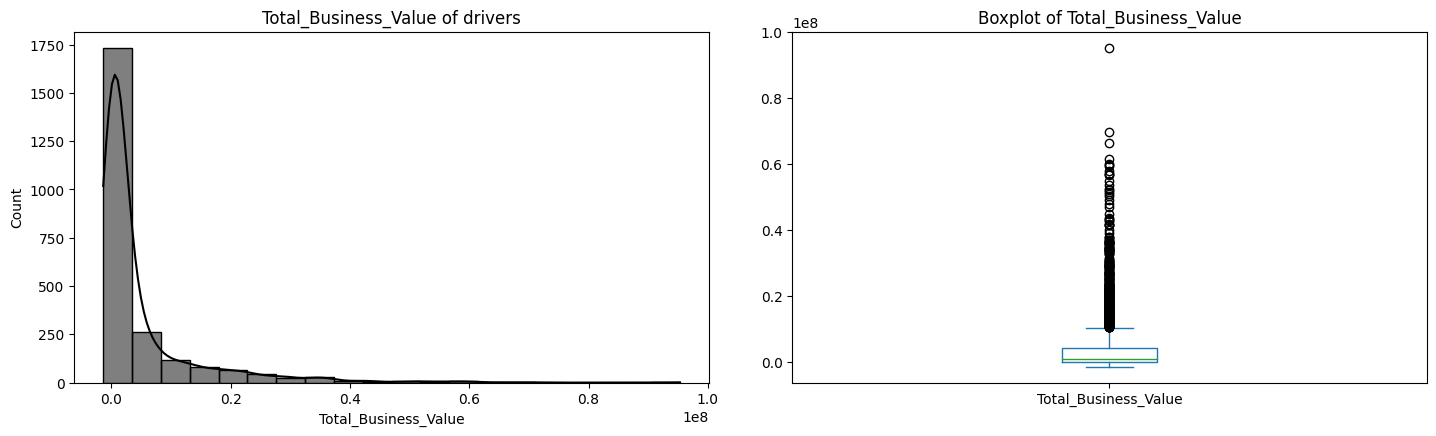

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(final_data['Total_Business_Value'],color='black', kde=True, bins=20)
plt.title("Total_Business_Value of drivers")
plt.subplot(122)
final_data['Total_Business_Value'].plot.box(title='Boxplot of Total_Business_Value')
plt.tight_layout(pad=3)

The distribution of total business value highly skewed on right which might indicate the outliers in the data

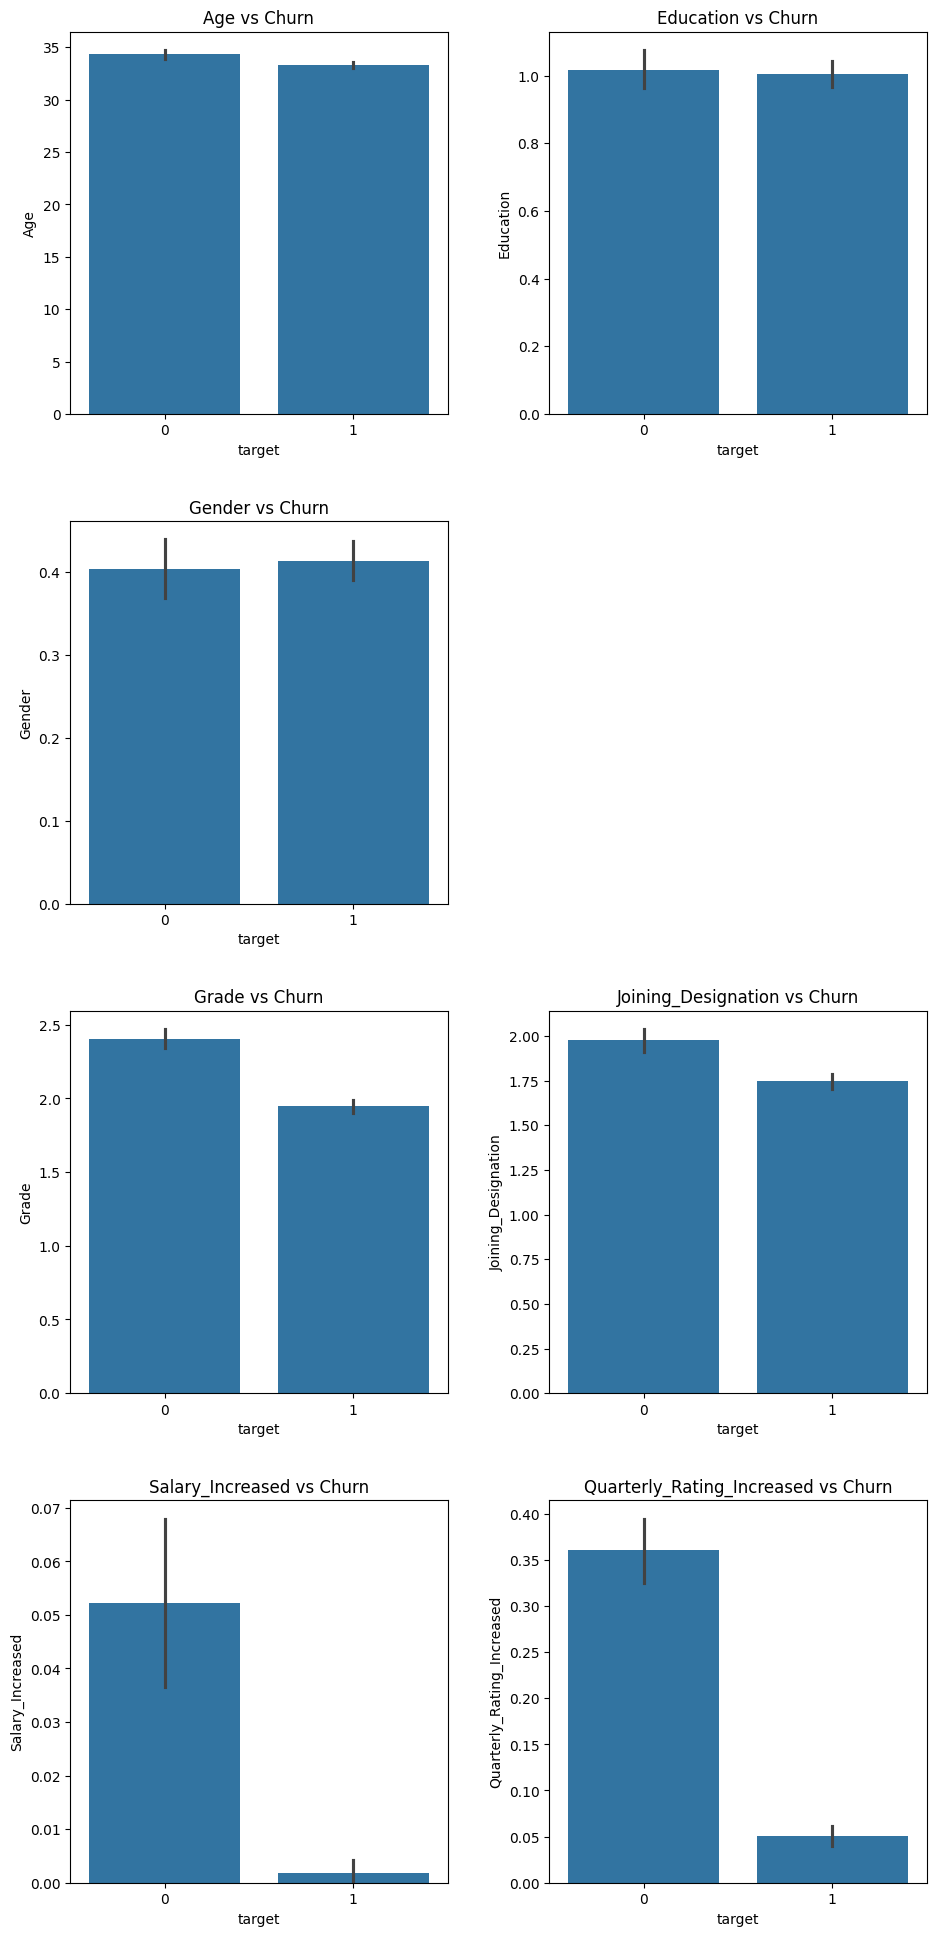

In [ ]:
plt.figure(figsize=(10,20))

plt.subplot(421)
sns.barplot(data=final_data, x="target", y="Age")
plt.title("Age vs Churn")

plt.subplot(422)
sns.barplot(data=final_data, x="target", y="Education")
plt.title("Education vs Churn")

plt.subplot(423)
sns.barplot(data=final_data, x="target", y="Gender")
plt.title("Gender vs Churn")

plt.subplot(425)
sns.barplot(data=final_data, x="target", y="Grade")
plt.title("Grade vs Churn")

plt.subplot(426)
sns.barplot(data=final_data, x="target", y="Joining_Designation")
plt.title("Joining_Designation vs Churn")

plt.subplot(427)
sns.barplot(data=final_data, x="target", y="Salary_Increased")
plt.title("Salary_Increased vs Churn")

plt.subplot(428)
sns.barplot(data=final_data, x="target", y="Quarterly_Rating_Increased")
plt.title("Quarterly_Rating_Increased vs Churn")

plt.tight_layout(pad=3)

.The proportion of Age, gender and education is more or less the same for both the employees who left the organization and those who did not leave.

.The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.

.The employees whose quarterly rating has increased are less likely to leave the organization.

.The employees whose monthly salary has not increased are more likely to leave the organization.

<ipython-input-98-6834c0db8efb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_data.corr(method="pearson"), annot=True, cmap="crest")


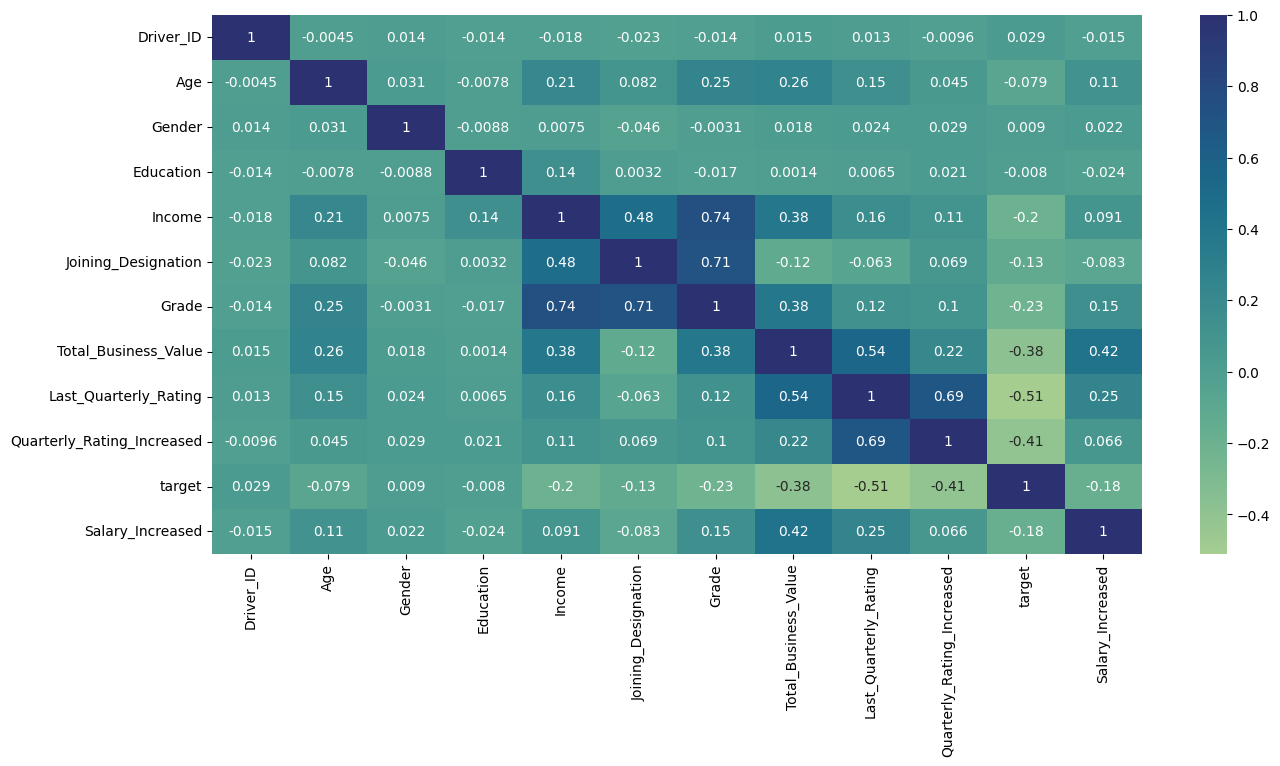

In [ ]:
plt.figure(figsize=(15, 7))

sns.heatmap(final_data.corr(method="pearson"), annot=True, cmap="crest")
plt.show()

.Income and Grade is highly correlated

.Total Business value and salary Last_Quarterly_rating is correlated

.Joining Designation and Grade is highly correlated

.Total Business value and salary increament is correlated

In [13]:
final_data

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,target,Salary_Increased
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,1,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,1,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,1,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,1,0,0
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,0,1,0
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,0,1,0
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,0,1,0


# Model Building

In [57]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve


**KNN IMPUTATION**

In [ ]:
num = final_data.select_dtypes(np.number)

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num)
new = imputer.transform(num)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data
numerical_data = label_encoder.fit_transform(final_data["City"])

final_data["City"]=numerical_data


convert categorical values using label encoding techniques

In [22]:
final_data.dtypes()

Driver_ID                       int64
Age                           float64
Gender                        float64
City                            int64
Education                       int64
Income                          int64
Joining_Designation             int64
Grade                           int64
Total_Business_Value            int64
Last_Quarterly_Rating           int64
Quarterly_Rating_Increased      int64
target                          int64
Salary_Increased                int64
dtype: object

now all features are numerical in nature

In [97]:
X=final_data.drop(columns="target")
y=final_data["target"]

In [54]:
X.shape,y.shape

((2381, 12), (2381,))

In [104]:
X = final_data.drop(["Driver_ID", "target", "City"], axis = 1)
X_cols = X.columns
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)

In [64]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 10)
X_test Shape:  (477, 10)
y_train Shape:  (1904,)
y_test Shape:  (477,)


**Random Forest Classifier - Before Balancing**

In [71]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150],
    "ccp_alpha":[0.001,0.01,0.1,1]
}

random_forest = RandomForestClassifier(class_weight="balanced")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Params:  {'ccp_alpha': 0.001, 'max_depth': 4, 'n_estimators': 150}
Best Score:  0.8405232643982448


              precision    recall  f1-score   support

           0       0.62      0.57      0.60       148
           1       0.81      0.84      0.83       329

    accuracy                           0.76       477
   macro avg       0.72      0.71      0.71       477
weighted avg       0.75      0.76      0.76       477



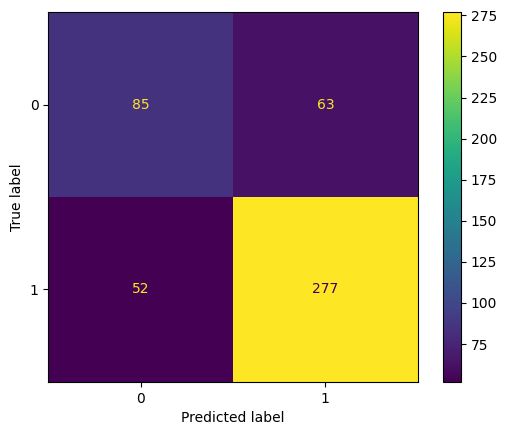

In [75]:
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

**Balancing Dataset using SMOTE**

In [78]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 7)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1287
Before OverSampling, counts of label '0': 617 

After OverSampling, the shape of train_X: (2574, 10)
After OverSampling, the shape of train_y: (2574,) 

After OverSampling, counts of label '1': 1287
After OverSampling, counts of label '0': 1287


**Ensemble Technique: Bagging
Random Forest Classifier**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 4, 'n_estimators': 200}
Best Score:  0.7593109297702328
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       148
           1       0.81      0.85      0.83       329

    accuracy                           0.76       477
   macro avg       0.72      0.71      0.71       477
weighted avg       0.76      0.76      0.76       477



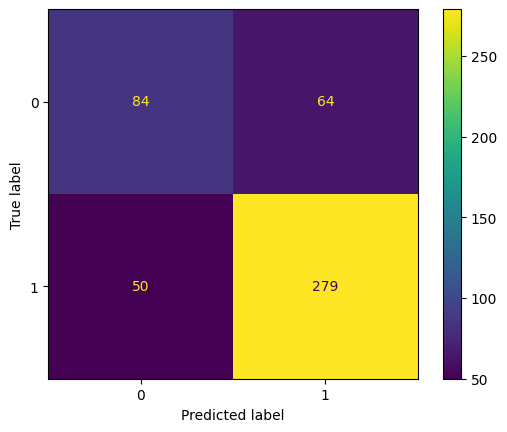

In [79]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
}
random_forest = RandomForestClassifier(class_weight="balanced_subsample")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

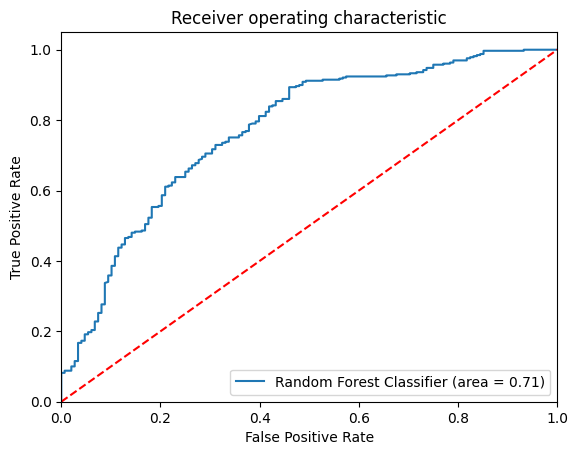

In [80]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Ensemble Technique: Boosting
Gradient Boosting Classifier**

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best Params:  {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best Score:  0.7956487956487956

 Elapsed Time:  341.47496008872986
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       148
           1       0.81      0.83      0.82       329

    accuracy                           0.75       477
   macro avg       0.70      0.70      0.70       477
weighted avg       0.74      0.75      0.74       477



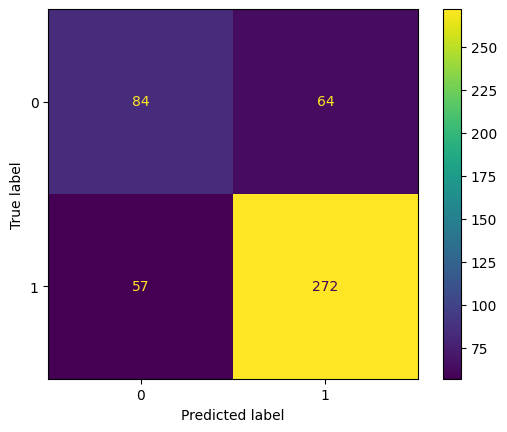

In [81]:
params = {
    "max_depth": [2, 3, 4],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [50,100,150,200]
}

gbdt = GradientBoostingClassifier()
c = GridSearchCV(estimator=gbdt, cv=3, n_jobs=-1, verbose=True, param_grid=params)

c.fit(X_train, y_train)
print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)


y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

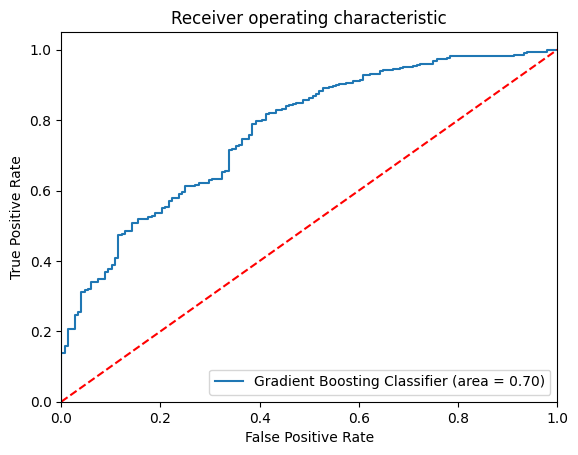

In [82]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**XGboost Classifier**

XGBoost Classifier Score:  0.7148846960167715

               precision    recall  f1-score   support

           0       0.54      0.57      0.55       148
           1       0.80      0.78      0.79       329

    accuracy                           0.71       477
   macro avg       0.67      0.67      0.67       477
weighted avg       0.72      0.71      0.72       477



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


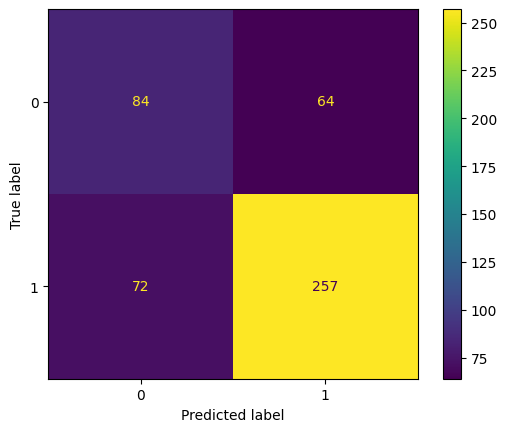

In [83]:
model = xgb.XGBClassifier(class_weight = "balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost Classifier Score: ", model.score(X_test, y_test))
print("\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

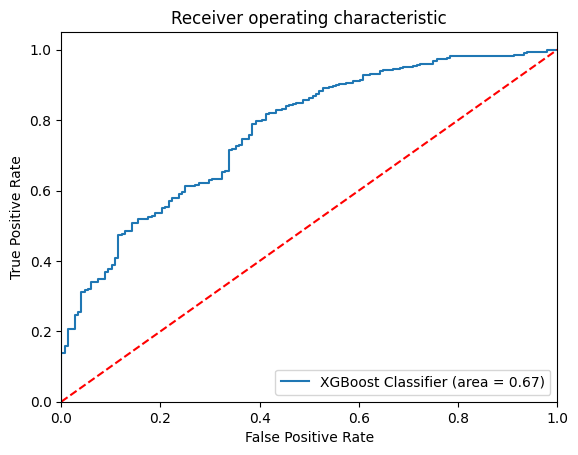

In [84]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**Final Model Evaluation:**

Upon evaluating the model performance, we noted a relatively lower recall for target 0, which may be attributed to the dataset's imbalance.

Precision signifies the proportion of relevant results returned by the algorithm, while recall indicates the proportion of relevant results retrieved among all relevant instances.

Our analysis reveals that the Random Forest model with SMOTE (Synthetic Minority Over-sampling Technique) consistently outperforms other models, demonstrating higher recall and precision values.

For the Random Forest model, the precision for predicted 0 is 73%, while for predicted 1, it stands at 82%. Meanwhile, the recall for actual 0 is 56%, and for actual 1, it reaches 91%.

The ROC-AUC curve area, a measure of model performance, for the Random Forest Classifier is 0.74, indicating satisfactory discriminative ability.

Evaluation of Gradient Boosting Classifier:

Precision for predicted 0: 62%, for predicted 1: 82%
Recall for actual 0: 60%, for actual 1: 83%
ROC-AUC curve area: 0.71
Evaluation of XGBoost Classifier:

Precision for predicted 0: 62%, for predicted 1: 81%
Recall for actual 0: 57%, for actual 1: 84%
ROC-AUC curve area: 0.71
In summary, while all models show promising performance, the Random Forest model with SMOTE stands out for its superior recall and precision values, indicating its effectiveness in identifying relevant instances and minimizing false negatives.

**Feature importance from best model**

In [85]:
rf = RandomForestClassifier(max_depth = 4, n_estimators= 50, class_weight="balanced")

rf.fit(X_train, y_train)
print("Score of RandomForestClassifier: ", rf.score(X_test, y_test))

Score of RandomForestClassifier:  0.7568134171907757


In [102]:
imp = rf.feature_importances_
imp

array([0.0293557 , 0.00217432, 0.00319216, 0.06853898, 0.08146358,
       0.06966873, 0.29769183, 0.30244081, 0.13329112, 0.01218277])

<Figure size 1500x700 with 0 Axes>

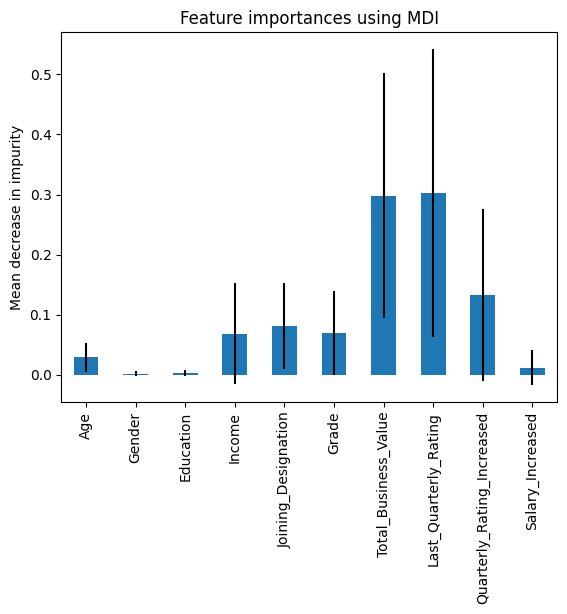

In [112]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
feature_importances = pd.Series(imp,new.columns )

plt.figure(figsize=(15,7))
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.show()

# Recommendations

1. To reduce employee turnover, the company should consider offering incentives
such as overtime pay or additional perks to retain drivers who have left the organization.

2. Employees who experience an increase in their quarterly ratings are less likely to leave the company. Implementing measures to boost quarterly ratings could help in reducing churn.

3. The company should introduce a reward system for customers who provide feedback and rate drivers. This initiative can incentivize customers to participate in the rating process, leading to more comprehensive feedback and improved driver performance.

4. Employees whose monthly salaries have remained stagnant are more inclined to leave the organization. Offering bonuses and additional perks to these employees may encourage them to stay and increase their earning potential.

5. Among the 2381 employees, 1744 individuals had their last quarterly rating as 1. Identifying the reasons behind this low rating and implementing corrective measures is crucial for employee retention and overall performance improvement.

6. It is concerning that the quarterly rating has not increased for 2076 employees out of 2381. This signals a need for closer monitoring and intervention to address any underlying issues affecting employee satisfaction and performance.

7. Key features such as Last Quarterly Rating, Total Business Value, and Quarterly Rating Increase should be closely tracked as predictors of employee turnover. Analyzing these features can help identify drivers at risk of leaving the company and implement targeted retention strategies.

8. The dataset may be imbalanced, affecting the recall score for target 0 (employees who left the company). Gathering more data can help address this issue and improve the model's performance in identifying at-risk employees.

9. The Random Forest Classifier achieves a recall score of 91% for employees who left the company. This indicates that the model is effectively identifying individuals at risk of turnover, providing valuable insights for retention efforts.